**Import Python Modules**

In [530]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from scipy.stats import beta
from scipy.stats import f
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.metrics import accuracy_score

**Upload dataset**

In [531]:
from google.colab import files
uploaded = files.upload()

Saving abalone_dataset.csv to abalone_dataset (15).csv


In [532]:
#read cvs file into dataframe
df = pd.read_csv('abalone_dataset.csv')
df.head(n=20)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,binaryClass
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,N
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,P
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,P
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,N
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,P
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,P
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,N
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,N
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,P
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,N


**Data pre-processing**

In [533]:
#Encode string variables
lb_make = LabelEncoder()

for col in df:
  first_value = df[col][0]
  if type(first_value) == str:
    # list_encoded.append(col)
    df[col] = lb_make.fit_transform(df[col])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,binaryClass
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


In [534]:
#BinaryClass_of data
#Here,0=Accepted & 1=Rejected
Y = df['binaryClass']
Y

0       0
1       1
2       1
3       0
4       1
       ..
4172    0
4173    0
4174    1
4175    0
4176    0
Name: binaryClass, Length: 4177, dtype: int64

In [535]:
df= df.drop('binaryClass', 1)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [536]:
#normalize data
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   float64
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(8)
memory usage: 261.2 KB


**Observations & Variables**

In [537]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

**Data Visualisation**

In [538]:
# plot size
plt.rcParams['figure.figsize'] = [9, 8]

[Text(0, 0, 'Sex'),
 Text(0, 0, 'Length'),
 Text(0, 0, 'Diameter'),
 Text(0, 0, 'Height'),
 Text(0, 0, 'Whole weight'),
 Text(0, 0, 'Shucked weight'),
 Text(0, 0, 'Viscera weight'),
 Text(0, 0, 'Shell weight')]

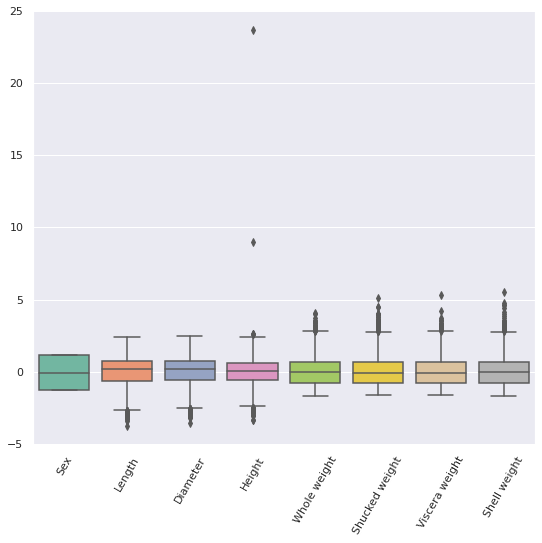

In [539]:
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

[Text(0, 0, 'Sex'),
 Text(0, 0, 'Length'),
 Text(0, 0, 'Diameter'),
 Text(0, 0, 'Height'),
 Text(0, 0, 'Whole weight'),
 Text(0, 0, 'Shucked weight'),
 Text(0, 0, 'Viscera weight'),
 Text(0, 0, 'Shell weight')]

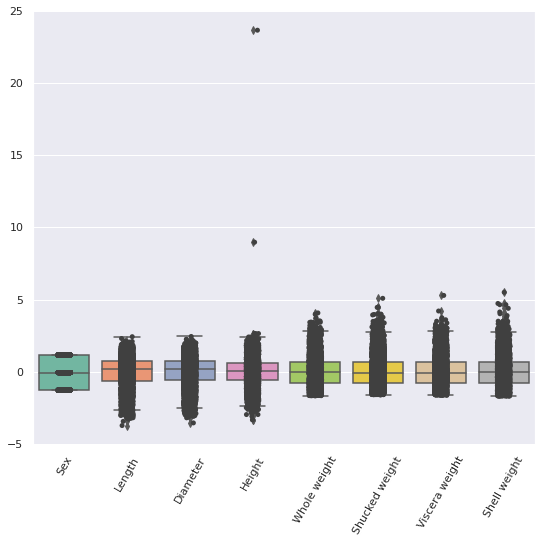

In [540]:
#Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

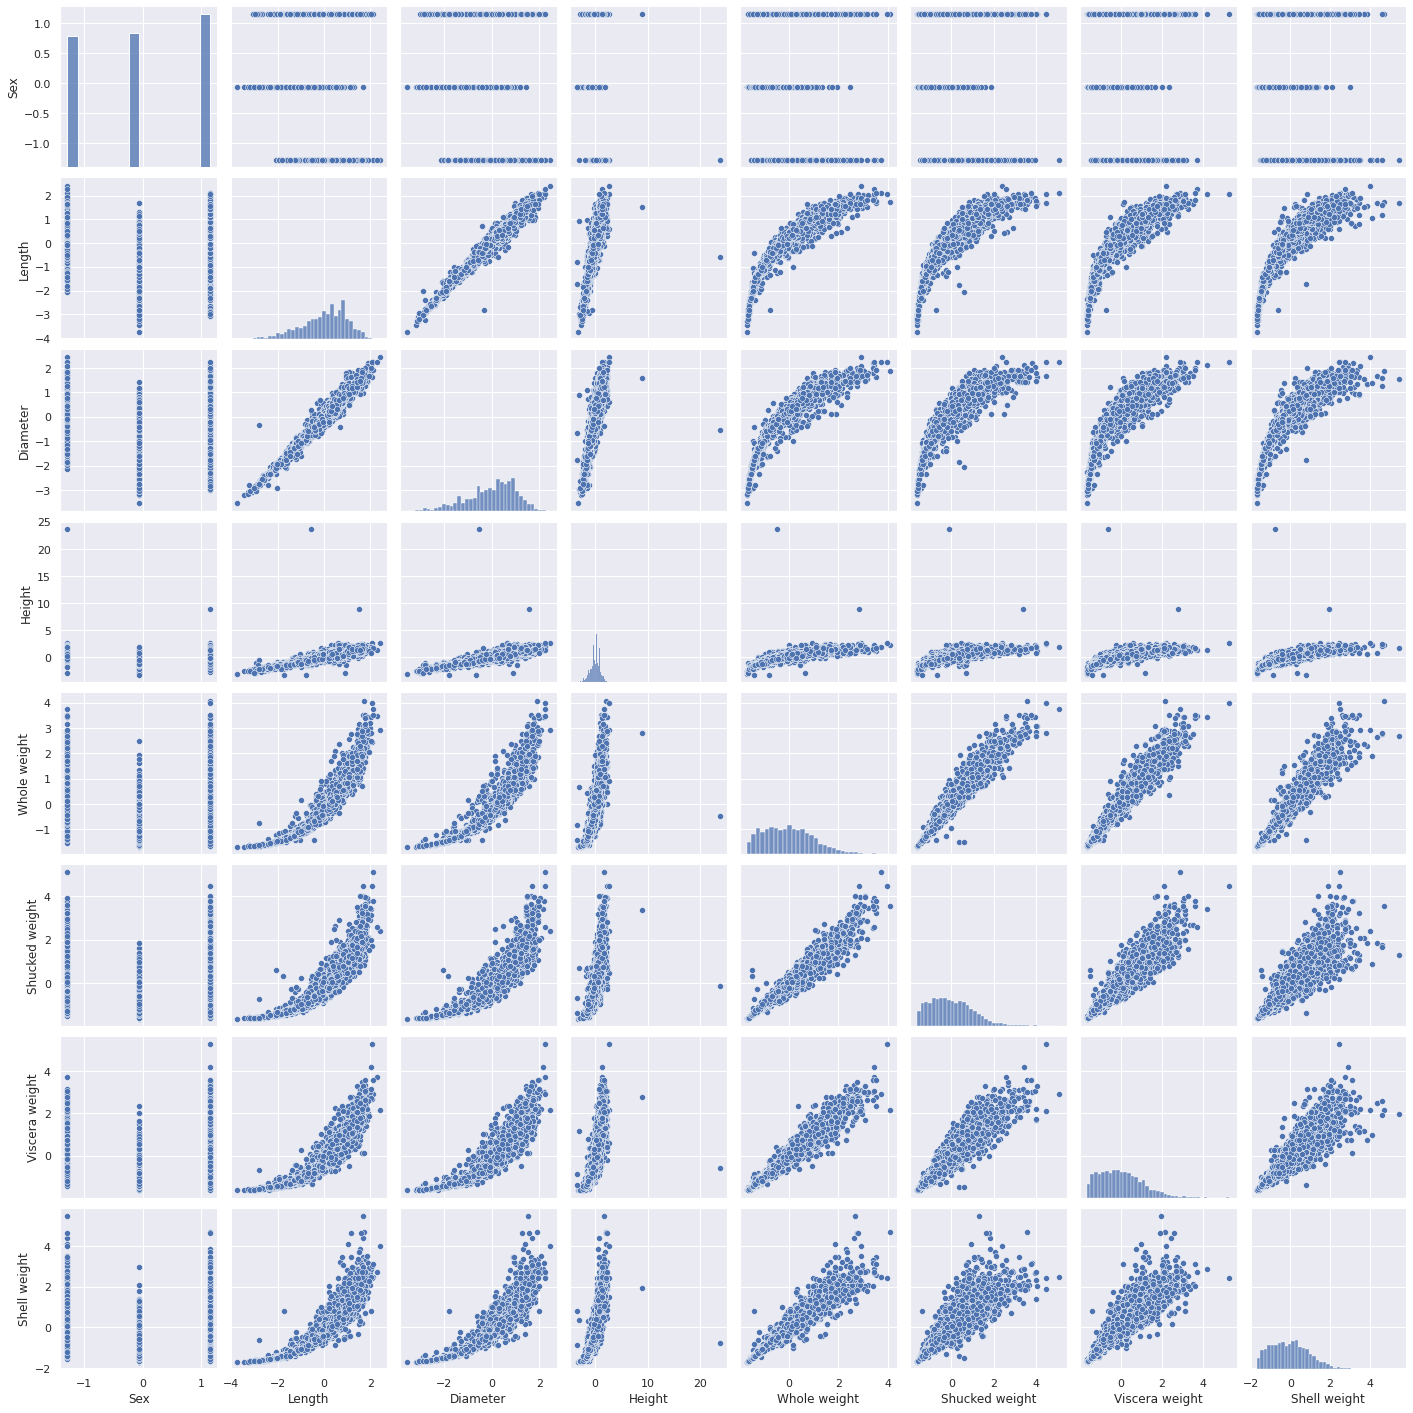

In [541]:
#pairplot
sns.pairplot(df)

**Covariance**

Text(0.5, 1.0, 'Covariance matrix')

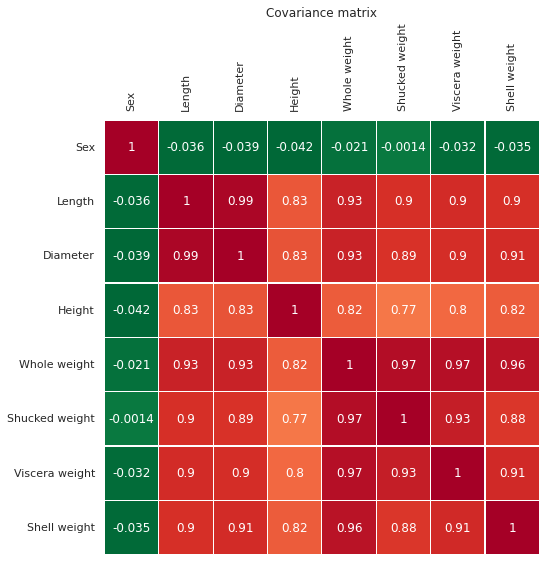

In [542]:
#centered data
dfc = df - df.mean() 
plt. figure()
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.2, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Covariance matrix')

**Principal component analysis(PCA)**

Text(0, 0.5, '$Z_2$')

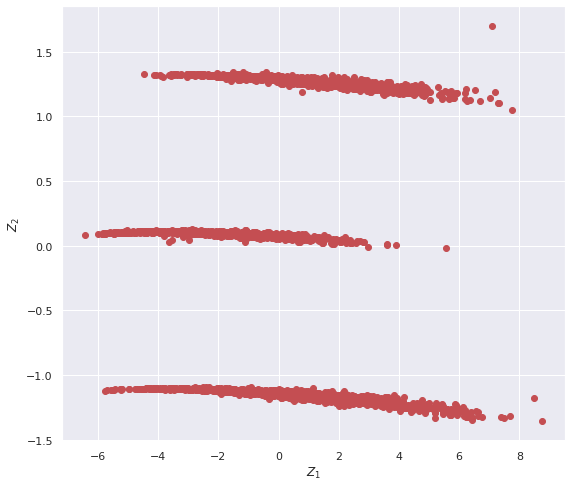

In [543]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure()
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

##For better visualization of data, we did not apply labeling the data points.As our dataset has 4000+ of data points.

#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
    #plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        #textcoords='offset points', ha='right', va='bottom')

**Eigenvectors**

EigenVector matrix--------->



array([[-0.015, -0.999,  0.034, -0.014, -0.016, -0.019,  0.001, -0.001],
       [ 0.383,  0.002,  0.036, -0.594,  0.087, -0.042, -0.7  , -0.024],
       [ 0.384,  0.005,  0.063, -0.586,  0.006, -0.01 ,  0.711,  0.016],
       [ 0.348,  0.017,  0.868,  0.312,  0.164,  0.027, -0.01 ,  0.001],
       [ 0.391, -0.017, -0.232,  0.231, -0.052,  0.111,  0.021, -0.851],
       [ 0.378, -0.039, -0.344,  0.229,  0.495,  0.549,  0.011,  0.372],
       [ 0.381, -0.005, -0.253,  0.272,  0.147, -0.807,  0.024,  0.205],
       [ 0.379,  0.   , -0.06 ,  0.165, -0.834,  0.177, -0.06 ,  0.307]])

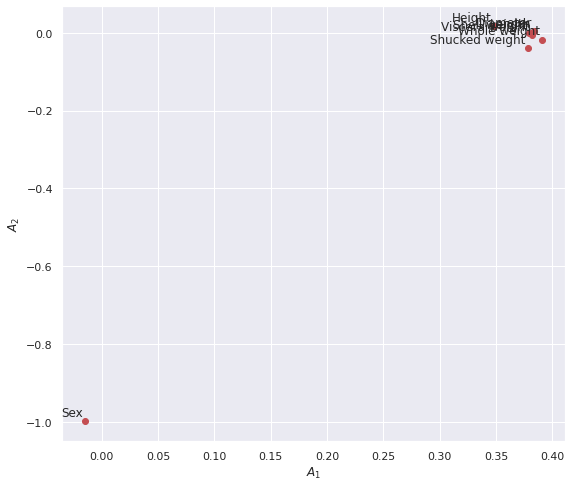

In [544]:
A = pca.components_.T 
#scater plot
plt. figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')
    
print("EigenVector matrix--------->" "\n")
np.round(A,3)

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


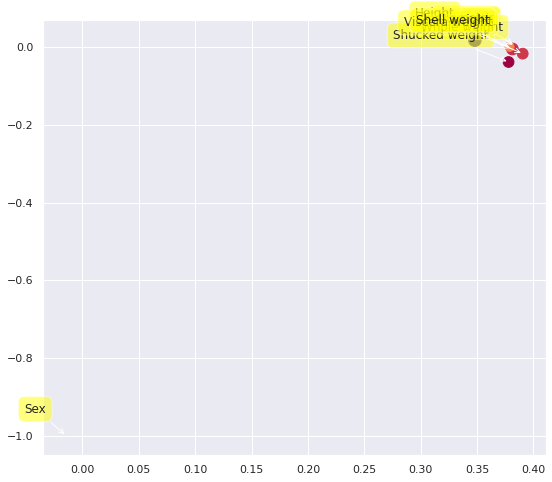

In [545]:
plt. figure()
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 3]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Eigenvalues & Scree plot**

Eigenvalues----->

[79.45299018 12.5053821   3.4823175   2.08988177  1.42293747  0.80419789
  0.15908484  0.08320825] 

The Sum of first two PCs: 91.95837228498128 



Text(0, 0.5, 'Explained variance')

<Figure size 648x576 with 0 Axes>

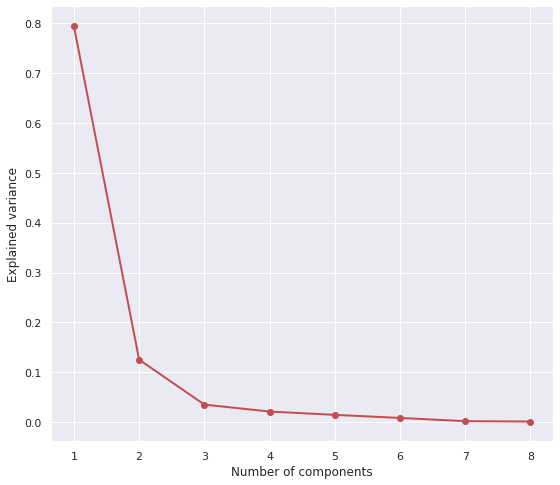

In [546]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

#Eigenvalues
Lambda = pca.explained_variance_ 
Lambda = Lambda/sum(Lambda) * 100
print("Eigenvalues----->\n")
print(Lambda,'\n')
s1 = sum(Lambda[:2]) 
print("The Sum of first two PCs: {} \n".format(s1))
#Scree plot
plt. figure()#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explaiend Variance**

Text(0, 0.5, 'Cumulative explained variance')

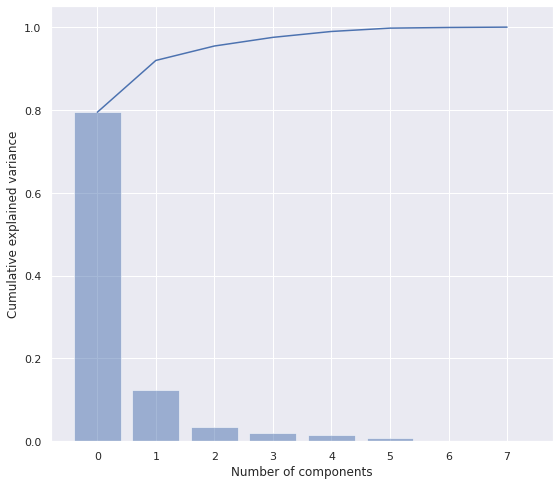

In [547]:
ell = pca.explained_variance_ratio_
plt. figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

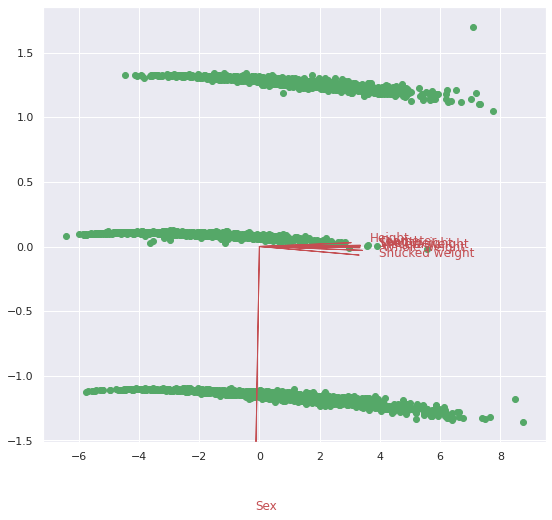

In [548]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='r')

for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='g', marker='o')
    
##For better visualization of data, we did not apply labeling the data points.As our dataset has 4000+ of data points.    
    #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

<Figure size 720x576 with 0 Axes>

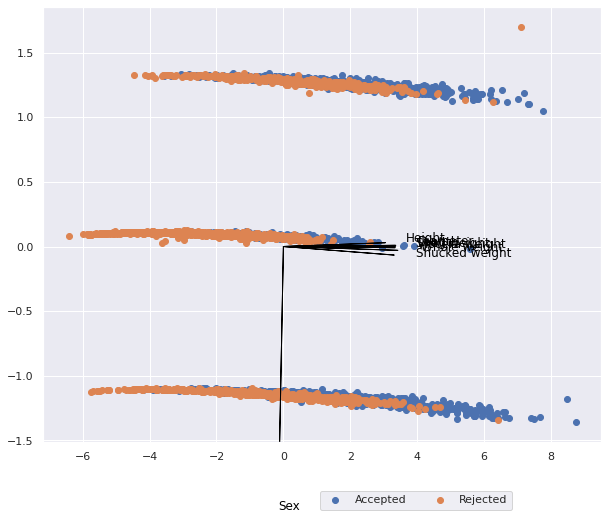

In [586]:
##Biplot for Classified Data

plt.figure()
fig, ax = plt.subplots()

for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    ax.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='black', width=0.00005, head_width=0.0025)
    ax.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2, variables[i], color='black')

labels = ["Accepted", "Rejected"]
for i in Y.unique():
#colors=['red','green','purple']
  ax.scatter(Z1[Y==i], Z2[Y==i], marker='o',label=labels[i])
 #   plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')
legend = ax.legend(shadow=False, ncol=3, bbox_to_anchor=(0.85, -0.1))
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

**Principal components(PC)**

Text(0.5, 1.0, 'Principal components')

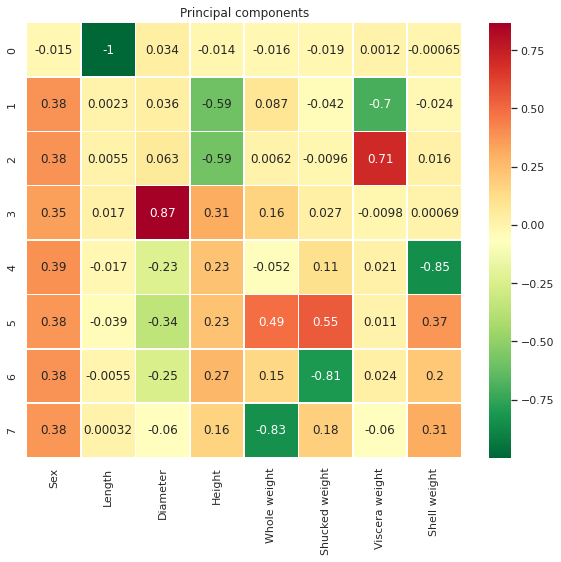

In [550]:
comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True,rotation=90)
plt.title('Principal components')

**Control Charts for Principal Components**

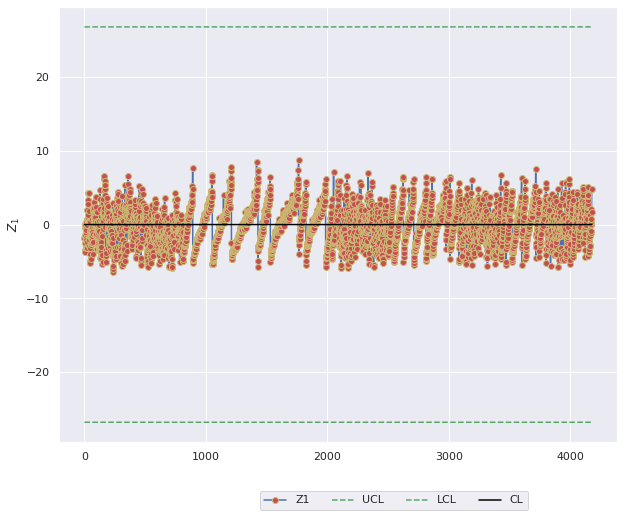

In [551]:
fig, ax = plt.subplots()
ax.plot(Z1,'-b', marker='o', mec='y',mfc='r' , label="Z1")
ax.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label='LCL')
ax.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
plt.ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

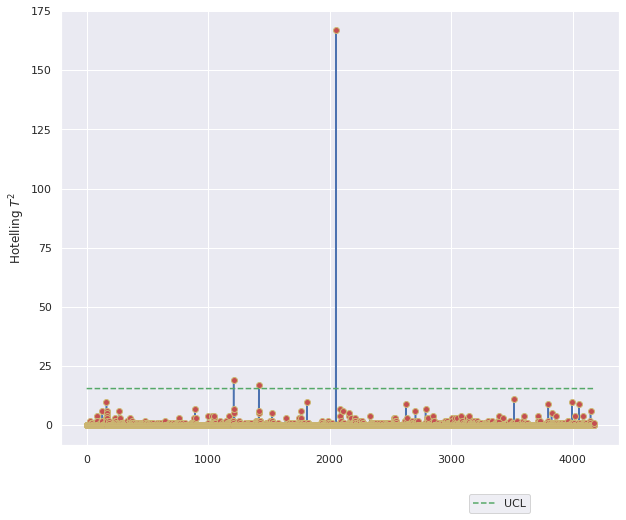

In [592]:
#Hotelling-T control chart

alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

**Classification**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


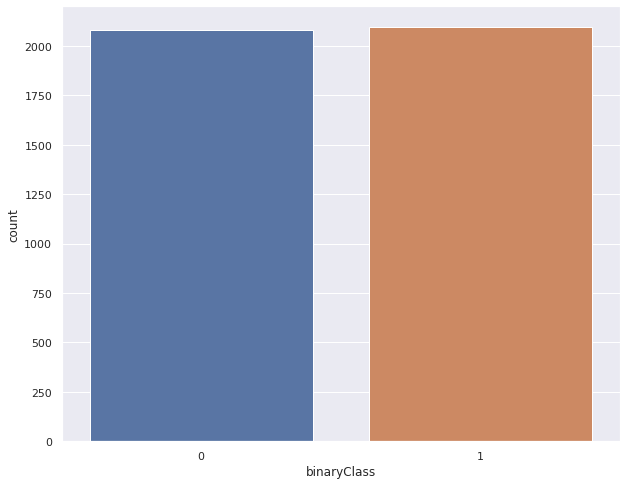

In [590]:
#Binary Class of data
sns.countplot(Y)

**Compare between Logistic regression-LR and K-Nearest neighbor-KNN by Accuracy & Fit Time**

In [565]:
##Compare among full data, all principal components(Z) and first two principal components(Z12)

logisticRegr = LogisticRegression(solver='lbfgs')
scoring=['accuracy']
scores_LR_full_data = cross_validate(logisticRegr, df, Y,cv=5, scoring=scoring)
scores_LR_Z = cross_validate(logisticRegr, Z, Y,cv=5, scoring=scoring)
scores_LR_Z12 = cross_validate(logisticRegr, Z[:,:2], Y,cv=5, scoring=scoring)


KNN_model = KNeighborsClassifier(n_neighbors=5)
scores_KNN_model_full_data = cross_validate(KNN_model, df, Y,cv=5, scoring=scoring)
scores_KNN_model_Z = cross_validate(KNN_model, Z, Y,cv=5, scoring=scoring)
scores_KNN_model_Z12 = cross_validate(KNN_model, Z[:,:2], Y,cv=5, scoring=scoring)

scores_dict={}
for i in ['fit_time','test_accuracy']:
  scores_dict["LR_full_data " + i ]=scores_LR_full_data[i]
  scores_dict["LR_Z  " + i ]=scores_LR_Z[i]
  scores_dict["LR_Z12 " + i ]=scores_LR_Z12[i]

  scores_dict["KNN_full_data " + i ]=scores_KNN_model_full_data[i]
  scores_dict["KNN_Z " + i ]=scores_KNN_model_Z[i]
  scores_dict["KNN_Z12 " + i ]=scores_KNN_model_Z12[i]

scores_data=pd.DataFrame(scores_dict)
scores_data

,LR_full_data fit_time,LR_Z fit_time,LR_Z12 fit_time,KNN_full_data fit_time,KNN_Z fit_time,KNN_Z12 fit_time,LR_full_data test_accuracy,LR_Z test_accuracy,LR_Z12 test_accuracy,KNN_full_data test_accuracy,KNN_Z test_accuracy,KNN_Z12 test_accuracy
0,0.073732,0.089393,0.025252,0.009452,0.005856,0.003453,0.809809,0.809809,0.758373,0.758373,0.758373,0.726077
1,0.101260,0.082461,0.049380,0.011612,0.006324,0.003535,0.790670,0.790670,0.714115,0.753589,0.753589,0.726077
2,0.088692,0.071329,0.019547,0.010541,0.005998,0.003488,0.780838,0.780838,0.742515,0.772455,0.772455,0.718563
3,0.097160,0.092581,0.016519,0.010005,0.006005,0.003412,0.786826,0.786826,0.710180,0.779641,0.779641,0.729341
4,0.080755,0.091132,0.010788,0.009216,0.005736,0.004232,0.761677,0.761677,0.707784,0.753293,0.753293,0.722156


Logistic Regression provides better accuracy.So, lets have a look more about logistic Regression

**Logistic Regression**

In [581]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_test, y_test)
logisticRegr_prediction = logisticRegr.predict(X_test)
coefficient_full = logisticRegr.coef_

Z_train, Z_test, yz_train, yz_test = train_test_split(Z, Y, test_size=0.2)
logisticRegr_z = LogisticRegression()
logisticRegr_z.fit(Z_train, yz_train)
score_z = logisticRegr_z.score(Z_test, yz_test)
print('Logistic regression prediction result ---->\n')
score_z = score_z * 100
print(score_z)
print('\n Confusion_matrix ---->\n')
print(confusion_matrix(logisticRegr_prediction , y_test))
print('\n Coefficent ---->\n')
coefficient_PCA = logisticRegr_z.coef_
np.around(coefficient_full, decimals=2)
np.around(coefficient_PCA, decimals=2)

Logistic regression prediction result ---->

80.622009569378

 Confusion_matrix ---->

[[346  93]
 [ 70 327]]

 Coefficent ---->



array([[-0.69, -0.03, -0.55, -0.13,  3.07,  0.9 , -0.97,  3.04]])

**ROC for Logistic Regression**

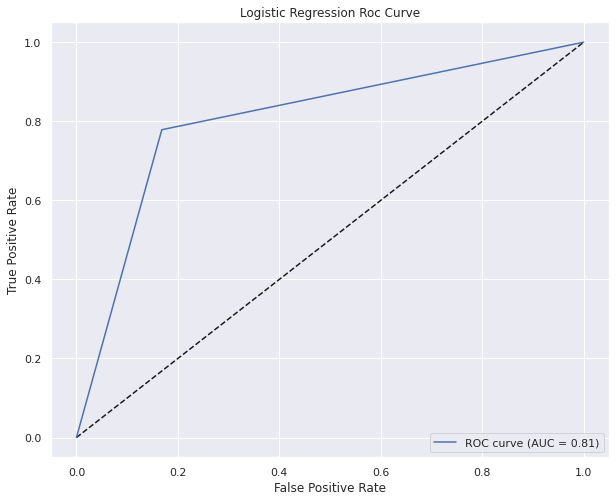

In [582]:
logisticRegr.fit(X_train, y_train)
y_pred=logisticRegr.predict(X_test)
from sklearn.metrics import roc_curve,auc
fpr,tpr,th=roc_curve(y_test,y_pred)
AUC=auc(fpr,tpr)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)'% AUC)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Roc Curve')
plt.legend(loc="lower right")
plt.show()

**ROC for KNeighbors Classifier**

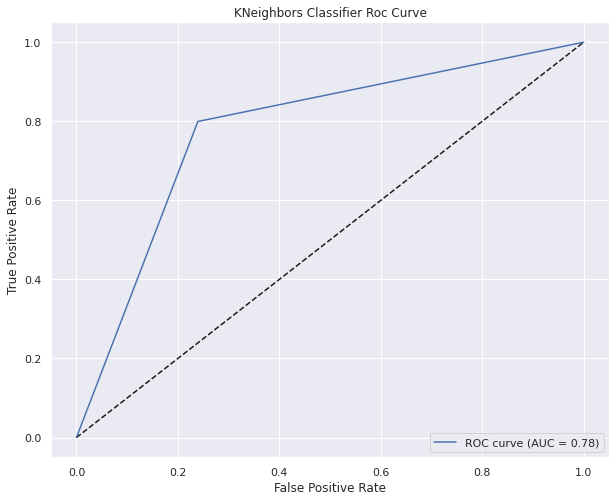

In [562]:
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
from sklearn.metrics import roc_curve,auc
fpr,tpr,th=roc_curve(y_test,y_pred)
AUC=auc(fpr,tpr)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)'% AUC)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNeighbors Classifier Roc Curve')
plt.legend(loc="lower right")
plt.show()

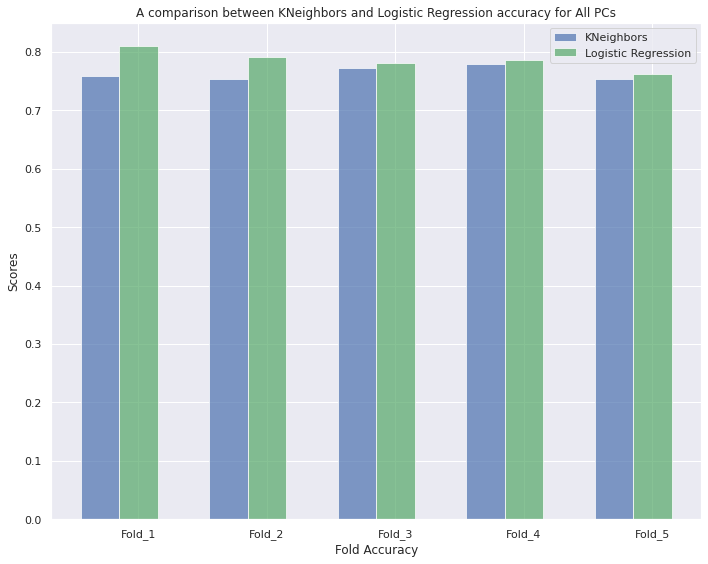

In [591]:
#Performance Comparision of Logistic Rigression & KNeighbor with All principal Components**

n_groups = 5

KNN = (0.758, 0.753, 0.772, 0.779, 0.753)
LR = (0.809, 0.790, 0.780, 0.786, 0.761)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.30
opacity = 0.70

rects1 = plt.bar(index, KNN, bar_width,
alpha=opacity,
color='b',
label='KNeighbors')

rects2 = plt.bar(index + bar_width, LR, bar_width,
alpha=opacity,
color='g',
label='Logistic Regression')

plt.xlabel('Fold Accuracy')
plt.ylabel('Scores')

plt.title('A comparison between KNeighbors and Logistic Regression accuracy for All PCs')
plt.xticks(index + bar_width, ('Fold_1', 'Fold_2', 'Fold_3', 'Fold_4','Fold_5'))
plt.legend()

plt.tight_layout()
plt.show()

Thank you !

Saidul Islam (ID: 40106992)